### 인공신경망

#### 신경망
- 신경망(神經網) 또는 뉴럴 네트워크(neural network)는 신경회로 또는 신경의 망(網)으로, 현대적 의미에서는 인공 뉴런이나 노드로 구성된 인공 신경망을 의미함.
- 신경망은 실제 생물학적 뉴런으로 구성된 생물학적 신경망이거나 인공지능(AI) 문제를 해결하기 위한 인공 신경망으로 구분

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/330px-Neural_network_example.svg.png" width="200" style="background:white">

#### 인공신경망 구조
- 입력층, 출력층, 은닉층으로 나뉘며, 은닉층의 수에 따라 일반 신경망과 심층 신경망으로 나뉨

<img src="https://i.namu.wiki/i/pdEoWDoLmv5lcQLKe2FA6anz6SD_VwDkqKhSsqBW-pUrBEf9ShO3Oi1sbcEAICWF2k2jLKqqZYbJI--DqBe33g.svg" width="500" style="background:white">

- 층의 하나의 셀에서 입력값을 가중치로 활성화 함수 통과시켜 출력하는 것을 반복

<img src="https://miro.medium.com/v2/resize:fit:816/1*BMSfafFNEpqGFCNU4smPkg.png" width="730">


#### 전파
- 전파/Forward Propagation - 입력층에서 은닉층을 거쳐 출력층을 지나 결과값이 나오는 것
- 역전파/Back Propagation - 결과와 정답의 차이르 계산된 손실을 다시 입력층으로 전달하는 것

#### 전체 모델구현

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

from tqdm import tqdm
import matplotlib.pyplot as plt

- 데이터 준비

In [2]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1), std=1)
x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

In [3]:
x.shape, y_noise.shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

##### nn.Sequential 클래스
- nn.Linear, nn.ReLU 같은 모듈들을 인수로 받아서 순서대로 정렬해놓고 입력값이 들어오면 이 순서대로 모듈을 실행하여 결괏값을 리턴. 그룹으로 처리하므로 효율적

In [4]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
    )

- 손실함수 및 옵티마이저

In [5]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

- 모델학습

In [6]:
loss_array = []

for i in tqdm(range(num_epoch)):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward() # 그래디언트 구하기
    optimizer.step() # 업데이트
    
    loss_array.append(loss) # 손실값 기록
    
    if i % 500 == 0:
        print(f'Epoch {i}\'s Loss: {loss}')

  1%|          | 60/10000 [00:00<00:43, 228.98it/s]

Epoch 0's Loss: 80.41363525390625


  5%|▌         | 535/10000 [00:01<00:29, 319.51it/s]

Epoch 500's Loss: 27.6169376373291


 11%|█         | 1058/10000 [00:03<00:29, 308.14it/s]

Epoch 1000's Loss: 18.317012786865234


 16%|█▌        | 1561/10000 [00:05<00:25, 324.75it/s]

Epoch 1500's Loss: 13.97066593170166


 20%|██        | 2048/10000 [00:06<00:23, 338.70it/s]

Epoch 2000's Loss: 9.862763404846191


 26%|██▌       | 2553/10000 [00:08<00:26, 281.06it/s]

Epoch 2500's Loss: 6.348485469818115


 31%|███       | 3052/10000 [00:09<00:21, 323.75it/s]

Epoch 3000's Loss: 7.951467990875244


 36%|███▌      | 3550/10000 [00:11<00:20, 312.76it/s]

Epoch 3500's Loss: 7.702915668487549


 40%|████      | 4048/10000 [00:13<00:20, 292.59it/s]

Epoch 4000's Loss: 5.381452560424805


 45%|████▌     | 4526/10000 [00:14<00:19, 276.79it/s]

Epoch 4500's Loss: 6.297921657562256


 51%|█████     | 5059/10000 [00:16<00:14, 331.11it/s]

Epoch 5000's Loss: 5.9545488357543945


 56%|█████▌    | 5559/10000 [00:18<00:13, 323.98it/s]

Epoch 5500's Loss: 5.729610443115234


 61%|██████    | 6055/10000 [00:19<00:13, 300.40it/s]

Epoch 6000's Loss: 5.510993003845215


 65%|██████▌   | 6547/10000 [00:21<00:11, 300.34it/s]

Epoch 6500's Loss: 5.908745765686035


 70%|███████   | 7048/10000 [00:22<00:09, 313.87it/s]

Epoch 7000's Loss: 5.265498161315918


 75%|███████▌  | 7540/10000 [00:24<00:07, 319.13it/s]

Epoch 7500's Loss: 5.740728378295898


 80%|████████  | 8041/10000 [00:26<00:06, 297.73it/s]

Epoch 8000's Loss: 5.558892250061035


 86%|████████▌ | 8566/10000 [00:28<00:04, 301.50it/s]

Epoch 8500's Loss: 5.4336838722229


 90%|█████████ | 9035/10000 [00:29<00:03, 308.67it/s]

Epoch 9000's Loss: 5.341348648071289


 96%|█████████▌| 9556/10000 [00:31<00:01, 305.81it/s]

Epoch 9500's Loss: 5.29332971572876


100%|██████████| 10000/10000 [00:32<00:00, 304.54it/s]


- 반복시 발생한 손실값 확인. epoch이 커져가면 점점 0에 가까워짐

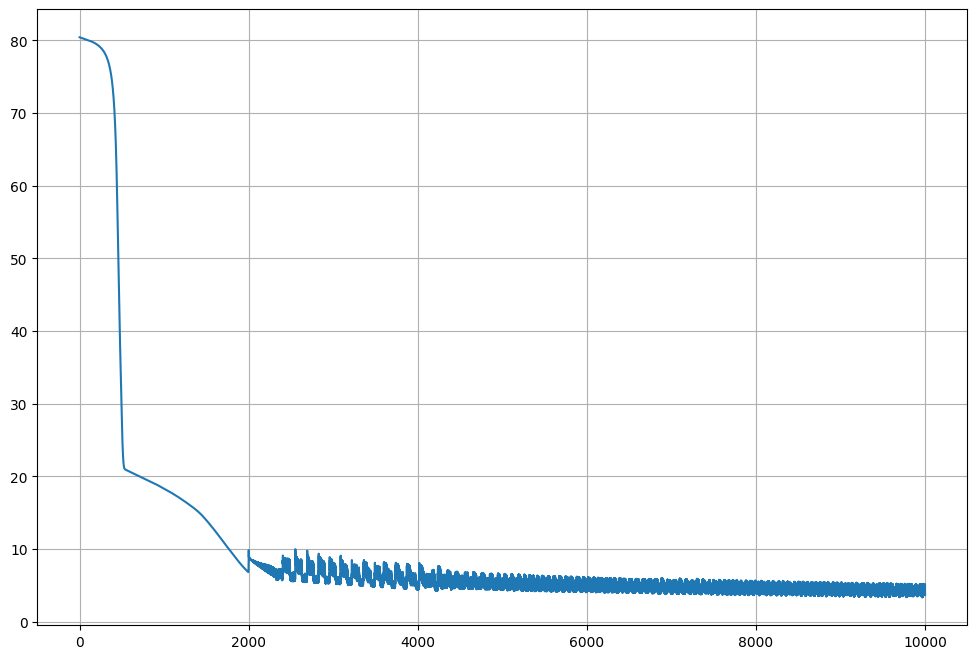

In [15]:
#plt.plot(loss_array) 
plt.figure(figsize=(12,8))
data = torch.Tensor(loss_array).detach().numpy()
plt.plot(data) # loss_array를 그냥 서용할 수 없음
plt.grid(True)
plt.show()

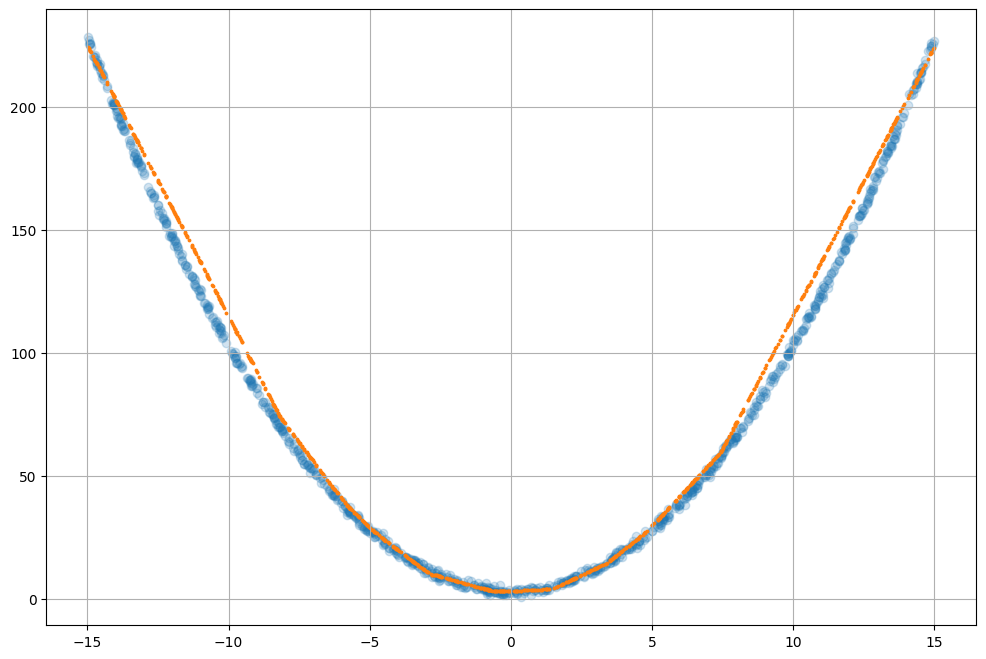

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(x,y_noise,alpha=0.2)
plt.scatter(x, model(x).detach().numpy(),s=3)
plt.grid(True)
plt.show()

- 파란 점은 노이즈를 추가한 데이터이며, 주황색 선은 학습한 모델을 통해 유추한 값을 의미
- 중간중간 꺾인 부분은 렐루 활성화 함수의 영향